In [150]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv(r'Amazon Sale Report.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [152]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [153]:
selected_columns = ["Date",	"Category",	"Size",	"Qty",	"Amount"] 
selected_columns 
df2 = df[selected_columns]
df2.head()

,Date,Category,Size,Qty,Amount
0,04-30-22,Set,S,0,647.62
1,04-30-22,kurta,3XL,1,406.00
2,04-30-22,kurta,XL,1,329.00
3,04-30-22,Western Dress,L,0,753.33
4,04-30-22,Top,3XL,1,574.00


In [154]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      128975 non-null  object 
 1   Category  128975 non-null  object 
 2   Size      128975 non-null  object 
 3   Qty       128975 non-null  int64  
 4   Amount    121180 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.9+ MB


In [155]:
df2.Category.value_counts() 

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

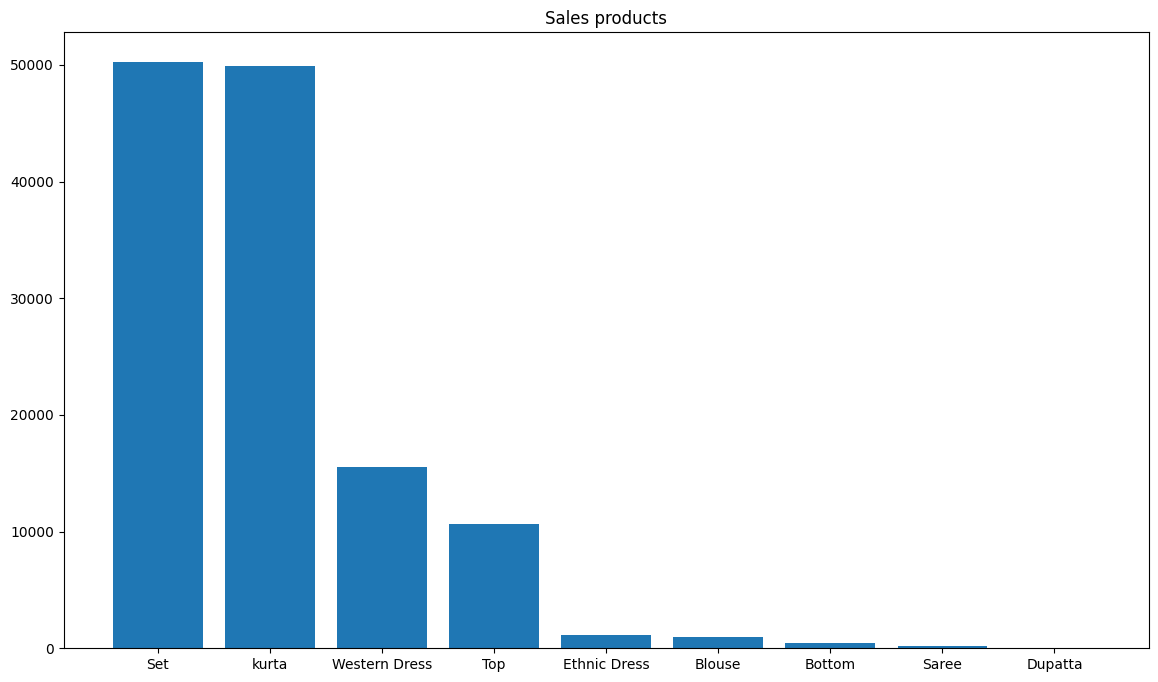

In [156]:
plt.figure(figsize=(14,8))
plt.bar(df2.Category.value_counts().keys(),df2.Category.value_counts().values )
plt.title("Sales products")
plt.show()


In [157]:
round(df2.isnull().sum()/df2.shape[0] * 100 ,2)  # missing values percetage wise

Date        0.00
Category    0.00
Size        0.00
Qty         0.00
Amount      6.04
dtype: float64

In [158]:
df2_groupby = df2.groupby('Category')
AVERAGE_AMOUNT_EACH_CLASS = (df2_groupby['Amount'].mean()).to_dict()
AVERAGE_AMOUNT_EACH_CLASS

{'Blouse': 520.3271055618615,
 'Bottom': 358.7332857142857,
 'Dupatta': 305.0,
 'Ethnic Dress': 723.8953888380604,
 'Saree': 799.5726451612903,
 'Set': 833.3855709791251,
 'Top': 526.0986030496803,
 'Western Dress': 762.7905801142546,
 'kurta': 455.92710790504526}

In [159]:
# Missing value imputation class wise 
for category , average_amount in AVERAGE_AMOUNT_EACH_CLASS.items():
    df3 = df2[df2['Category'] == category]
    # print(category,"    ",average_amount)
    df3['Amount'] = df3['Amount'].fillna(average_amount)

In [160]:
round(df3.isnull().sum()/df3.shape[0] * 100 ,2)  # missing values percetage wise


Date        0.0
Category    0.0
Size        0.0
Qty         0.0
Amount      0.0
dtype: float64

In [161]:
kurta = df3[df3['Category']=='kurta']
kurta.head()

,Date,Category,Size,Qty,Amount
1,04-30-22,kurta,3XL,1,406.0
2,04-30-22,kurta,XL,1,329.0
7,04-30-22,kurta,S,1,399.0
9,04-30-22,kurta,XXL,1,363.0
10,04-30-22,kurta,S,1,685.0


In [162]:
kurta['Date']= pd.to_datetime(kurta['Date'])

In [163]:
# data day, month , year wise 
kurta['Day'] = kurta['Date'].dt.day 
kurta['Month'] = kurta['Date'].dt.month 
kurta['Year'] = kurta['Date'].dt.year 


In [164]:
kurta.head()

,Date,Category,Size,Qty,Amount,Day,Month,Year
1,2022-04-30,kurta,3XL,1,406.0,30,4,2022
2,2022-04-30,kurta,XL,1,329.0,30,4,2022
7,2022-04-30,kurta,S,1,399.0,30,4,2022
9,2022-04-30,kurta,XXL,1,363.0,30,4,2022
10,2022-04-30,kurta,S,1,685.0,30,4,2022


In [165]:
print("Product Data from : ",kurta['Date'].min())
print("Till here : ",kurta['Date'].min())

Product Data from :  2022-03-31 00:00:00
Till here :  2022-03-31 00:00:00


In [188]:
month_dt = {'march':3,'april':4,'may':5,'jun':6}

april_month_sales = kurta[kurta['Month'] == month_dt['april']]
april_month_sales.head()

,Date,Category,Size,Qty,Amount,Day,Month,Year
1,2022-04-30,kurta,3XL,1,406.0,30,4,2022
2,2022-04-30,kurta,XL,1,329.0,30,4,2022
7,2022-04-30,kurta,S,1,399.0,30,4,2022
9,2022-04-30,kurta,XXL,1,363.0,30,4,2022
10,2022-04-30,kurta,S,1,685.0,30,4,2022


In [167]:
april_month_sales['Day'].unique()   # daily bases records are present 

array([30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
       13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int32)

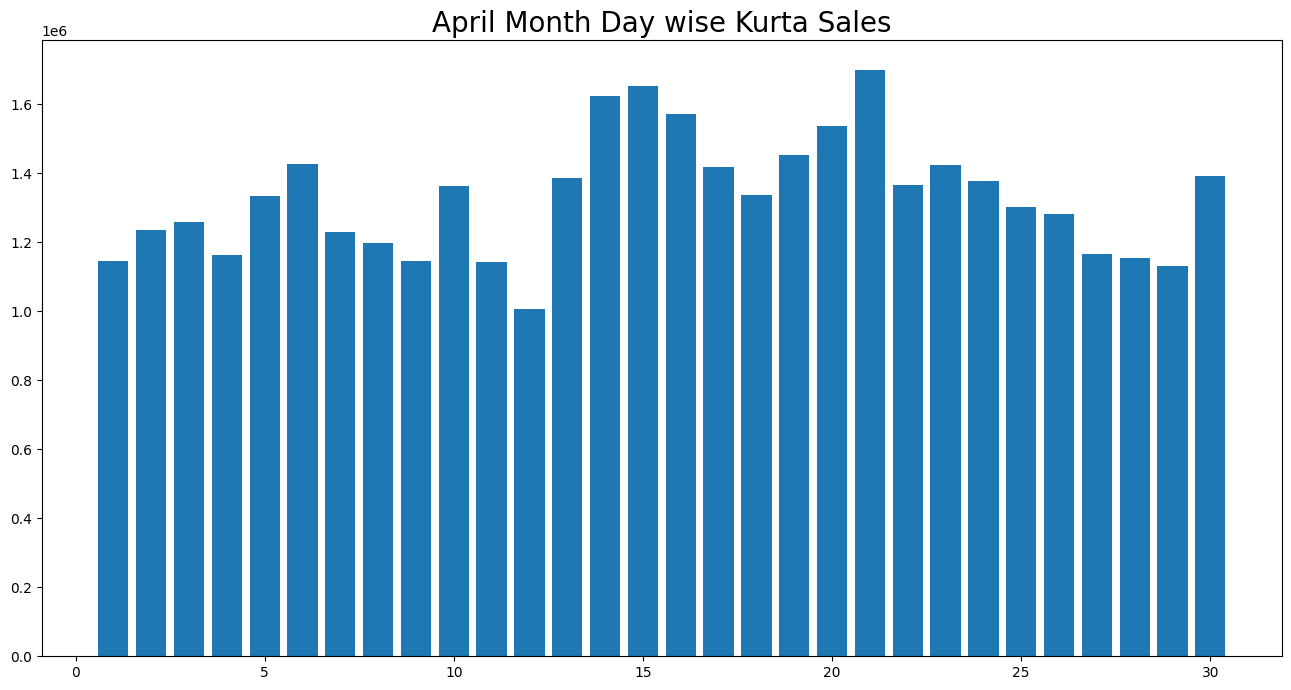

In [184]:
## Daywise sales in april month 
day_wise_group = april_month_sales.groupby('Day')

plt.figure(figsize=(16,8))
plt.bar(day_wise_group['Year'].sum().keys(),day_wise_group['Year'].sum().values)
plt.title("April Month Day wise Kurta Sales",fontdict={'fontsize':20})
plt.show()

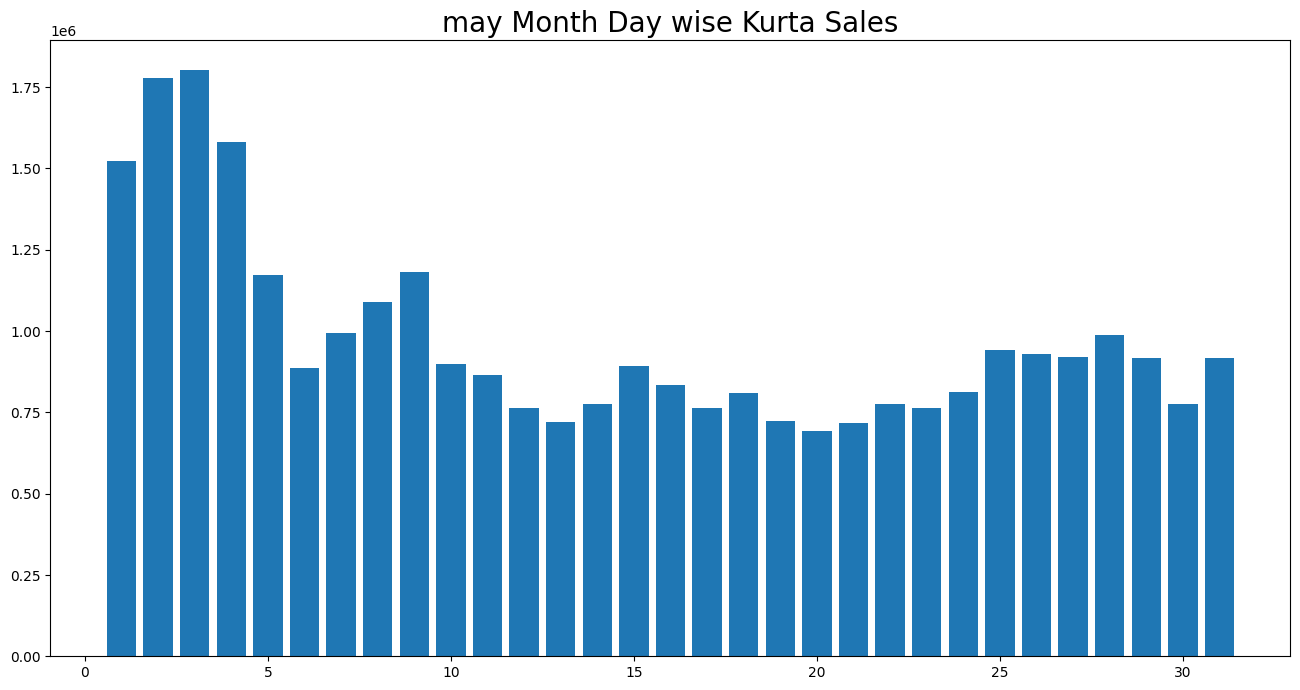

In [186]:
may_month_sales = kurta[kurta['Month'] == month_dt['may']]

## Daywise sales  
day_wise_group = may_month_sales.groupby('Day')

plt.figure(figsize=(16,8))
plt.bar(day_wise_group['Year'].sum().keys(),day_wise_group['Year'].sum().values)
plt.title("may Month Day wise Kurta Sales",fontdict={'fontsize':20})
plt.show()

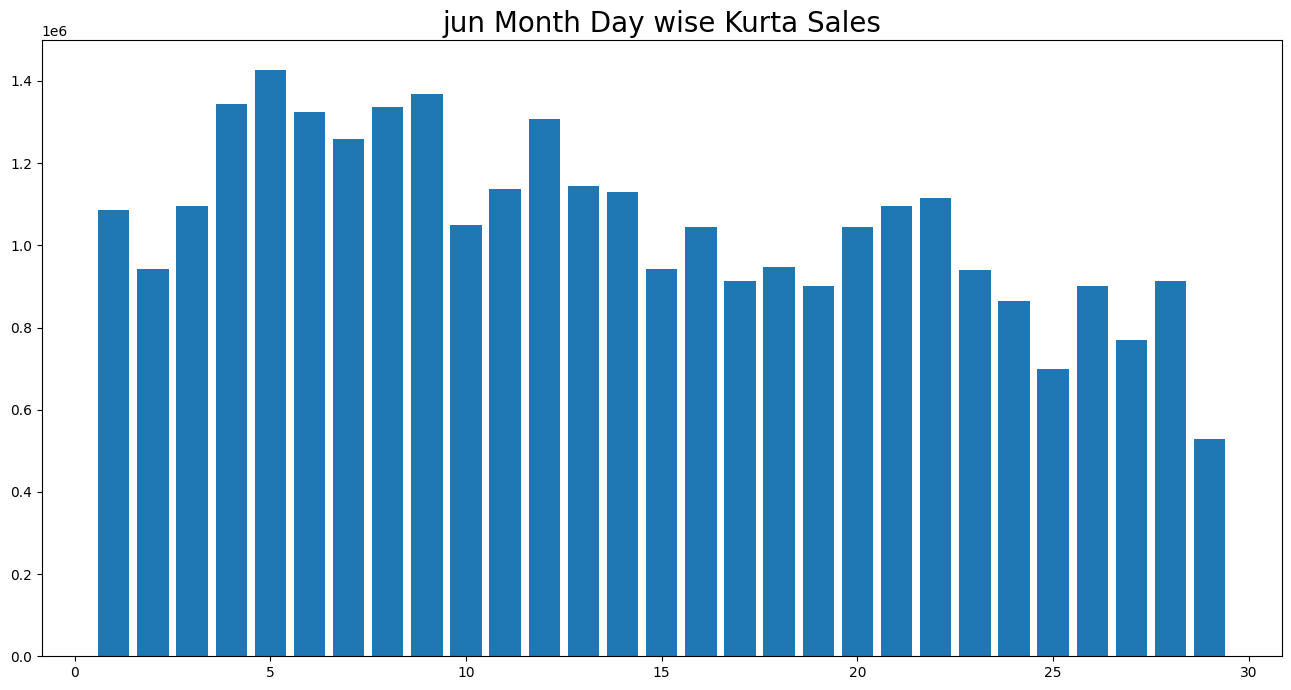

In [198]:
jun_month_sales = kurta[kurta['Month'] == month_dt['jun']]

## Daywise sales  
day_wise_group = jun_month_sales.groupby('Day')

plt.figure(figsize=(16,8))
plt.bar(day_wise_group['Year'].sum().keys(),day_wise_group['Year'].sum().values)
plt.title("jun Month Day wise Kurta Sales",fontdict={'fontsize':20})
plt.show()

In [208]:

group1 = kurta[kurta['Month'] == month_dt['april']].groupby('Date')
group2 = kurta[kurta['Month'] == month_dt['may']].groupby('Date')
group3 = kurta[kurta['Month'] == month_dt['jun']].groupby('Date')



In [213]:
dataset = pd.concat([group1[['Day']].sum(),group2[['Day']].sum(),group3[['Day']].sum()])
dataset.to_csv("forcasting_data.csv")

In [214]:
dataset.head()

,Day
Date,
2022-04-01,566
2022-04-02,1222
2022-04-03,1869
2022-04-04,2300
2022-04-05,3300
